In [51]:
import sys
print(sys.version)
# TF2.xの読み込み
import tensorflow as tf
# バージョンの確認
print('TensorFlow version: {}'.format(tf.__version__))


3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 1.15.0


In [52]:
import os
os.environ['PATH']=r'C:\Users\kazuk\anaconda3\envs\tensorflow36_conda;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\mingw-w64\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\usr\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Scripts;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\bin;C:\Users\kazuk\anaconda3\condabin;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files\Git\cmd;C:\gcloud\google-cloud-sdk\bin;C:\MinGW\bin\gcc.exe;C:\Windows\py.exe;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Microsoft SQL Server\120\Tools\Binn;C:\Program Files\Intel\WiFi\bin;C:\Program Files\Common Files\Intel\WirelessCommon;C:\Program Files\dotnet;C:\Program Files\Zulu\zulu-8\bin;C:\Program Files\Pandoc;C:\Go\bin;C:\Users\kazuk\AppData\Local\Programs\Python\Python36;C:\Users\kazuk\AppData\Local\Programs\Python\Python36;C:\Users\kazuk\AppData\Local\Programs\Python\Python38-32\Scripts;C:\Users\kazuk\AppData\Local\Programs\Python\Python38-32;C:\Users\kazuk\AppData\Local\Microsoft\WindowsApps;C:\Users\kazuk\AppData\Local\Continuum\Anaconda3;C:\Users\kazuk\AppData\Local\Continuum\Anaconda3\Scripts;C:\Users\kazuk\AppData\Local\Continuum\Anaconda3\Library\bin;C:\Users\kazuk\AppData\Local\Programs\Python\Python37\python.exe;C:\pg\Python37;C:\Users\kazuk\AppData\Local\Programs\Python\Python37;C:\Users\kazuk\AppData\Local\Programs\Python\Python37\Lib\site-packages;C:\Users\kazuk\AppData\Local\Programs\Python\Python37\Scripts;C:\Users\kazuk\AppData\Roaming\Python\Python37\site-packages\slackbot;C:\MinGW\bin;C:\Users\kazuk\AppData\Local\GitHubDesktop\bin;C:\Users\kazuk\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\kazuk\AppData\Local\Microsoft\WindowsApps;C:\Users\kazuk\go\bin;C:\Go\bin;C:\Program Files (x86)\MeCab\bin;C:\Windows;C:\Windows\system32;C:\texlive\2020\bin\win32;C:\Users\kazuk\anaconda3\Scripts;C:\Users\kazuk\anaconda3\Library\bin;C:\Users\kazuk\go\bin;C:\Users\kazuk;C:\msys64\usr\bin;.;C:\Users\kazuk\AppData\Local\Google\Cloud SDK\google-cloud-sdk\bin;C:\Program Files (x86)\Google\Cloud SDK\google-cloud-sdk\bin;C:\Program Files\Google\Cloud SDK\google-cloud-sdk\bin;C:\Users\kazuk\AppData\Local\cloud-code\installer\google-cloud-sdk\bin;C:\Program Files\Graphviin;C:\Program Files\Graphviin\bin;C:\Users\kazuk\anaconda3\Library\bin\graphviz'
print(os.environ['PATH'])

#os.environ['PATH']+=';C:\Program Files\Graphviz\bin'
#os.environ['PATH']+=';C:\Program Files\Graphviz\bin'
for i in os.environ['PATH'].split(";"):
    print(i)

C:\Users\kazuk\anaconda3\envs\tensorflow36_conda;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\mingw-w64\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\usr\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Scripts;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\bin;C:\Users\kazuk\anaconda3\condabin;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files\Git\cmd;C:\gcloud\google-cloud-sdk\bin;C:\MinGW\bin\gcc.exe;C:\Windows\py.exe;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Microsoft SQL Server\120\Tools\Binn;C:\Program Files\Intel\WiFi\bin;C:\Program Files\Common Files\Intel\WirelessCommon;C:\Program Files\dotnet;C:\Program Files\Zulu\zulu-8\bin;C:\Program Files\Pandoc;C:\Go\bin;C:\Users\kazuk\AppData\Lo

In [53]:
import subprocess
proc = subprocess.run(["dot.exe","-V"],stdout = subprocess.PIPE, stderr = subprocess.PIPE,shell=True)
print(proc.stdout.decode("cp932"))

In [54]:
# MNISTデータセットを使用
mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()
# 0~1へ正規化する
x_train, x_test = x_train / 255., x_test / 255.
print(x_train.shape, x_test.shape, t_train.shape, t_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [55]:
# 1.モデルの構築
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28), name='inputs'),
  tf.keras.layers.Dense(128, activation='relu', name='relu'),
  tf.keras.layers.Dense(10, activation='softmax', name='softmax')
], name='Sequential')
# 2.モデルのコンパイル
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 3.モデルの学習
history = model.fit(x_train, t_train, epochs=5, batch_size=32)
# 4.モデルの評価
model.evaluate(x_test,  t_test, verbose=1)
# 5.モデルの保存(シリアル化)
model.save('Sequential_model')
# モデルの読み込み
model_load = tf.keras.models.load_model('Sequential_model')
# グラフの可視化


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2643 - acc: 0.9254
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1152 - acc: 0.9665
Epoch 3/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0799 - acc: 0.9761
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0593 - acc: 0.9819
Epoch 5/5
10000/10000 [==============================] - 0s 34us/sample - loss: 0.0835 - acc: 0.9754


OSError: Unable to create file (unable to open file: name = 'Sequential_model', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

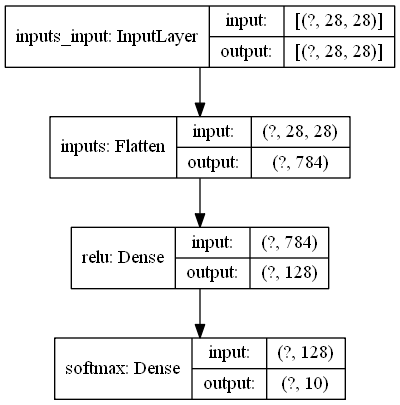

In [56]:
tf.keras.utils.plot_model(model, to_file='Sequetial.png', show_shapes=True)

Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (Flatten)             (None, 784)               0         
_________________________________________________________________
relu (Dense)                 (None, 128)               100480    
_________________________________________________________________
softmax (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


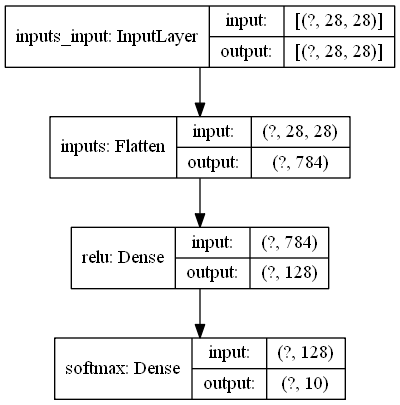

In [57]:
print(model.summary())
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
)

In [58]:
x=tf.Variable(0.,name='x')
def f(x):
    return (x-1)**2
optimizer=tf.train.

SyntaxError: invalid syntax (<ipython-input-58-fc43d8df5b3d>, line 4)

In [59]:
a=tf.Variable(1,name='a')
b=tf.assign(a,a+1)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(b))
    print(sess.run(b))

2
3


In [60]:
LOG_DIR='./logs'

a=tf.constant(1,name='a')
b=tf.constant(2,name='b')

graph=tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

In [61]:
x=tf.Variable(-100.,name='x')
func=(x-1)**2
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.2)
train_step=optimizer.minimize(func)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20):
        sess.run(train_step)
        print('x=',sess.run(x))

x= -59.6
x= -35.36
x= -20.816
x= -12.0896
x= -6.85376
x= -3.7122557
x= -1.8273535
x= -0.6964121
x= -0.01784724
x= 0.38929167
x= 0.633575
x= 0.78014505
x= 0.86808705
x= 0.92085224
x= 0.95251137
x= 0.97150683
x= 0.9829041
x= 0.98974246
x= 0.99384546
x= 0.99630725


In [62]:
import keras
(x_train,y_train),(x_test,y_test)=keras.datasets.boston_housing.load_data()

In [63]:
display(x_train)
print(type(x_train))
print(x_train.shape)

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

<class 'numpy.ndarray'>
(404, 13)


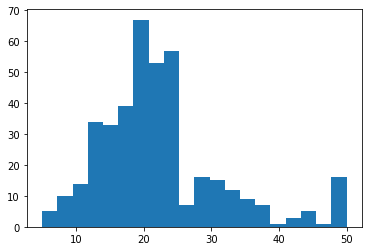

In [64]:
import matplotlib.pyplot as plt
plt.hist(y_train,bins=20)
plt.show()

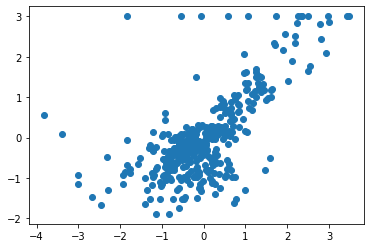

In [65]:
x_train_mean=x_train.mean(axis=0)
y_train_mean=y_train.mean()
x_train_std=x_train.std(axis=0)
y_train_std=y_train.std()
x_train=(x_train-x_train_mean)/x_train_std
y_train=(y_train-y_train_mean)/y_train_std
x_test=(x_test-x_train_mean)/x_train_std
y_test=(y_test-y_train_mean)/y_train_std
plt.plot(x_train[:,5],y_train,'o')
plt.show()

In [66]:
x=tf.placeholder(tf.float32,(None,13),name='x')
y=tf.placeholder(tf.float32,(None,1),name='y')
w=tf.Variable(tf.random_normal((13,1)))
pred=tf.matmul(x,w)

In [67]:
loss=tf.reduce_mean((y-pred)**2)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step=optimizer.minimize(loss)

In [68]:
step_list=[]
train_loss_list=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        train_loss,_=sess.run(
            [loss,train_step],feed_dict={
                x:x_train,
                y:y_train.reshape((-1,1))
            }
        )
        print(step,train_loss)
        step_list.append(step)
        train_loss_list.append(train_loss)

0 16.757082
1 9.013254
2 5.9966063
3 4.219154
4 3.0992093
5 2.374498
6 1.8934124
7 1.5650177
8 1.3340025
9 1.1662827
10 1.0405681
11 0.94336313
12 0.8659792
13 0.80272865
14 0.7498243
15 0.70469743
16 0.66557205
17 0.6311961
18 0.60066754
19 0.573323
20 0.54866403
21 0.5263069
22 0.50595075
23 0.4873539
24 0.4703187
25 0.4546808
26 0.44030073
27 0.42705902
28 0.41485155
29 0.40358704
30 0.3931844
31 0.38357136
32 0.3746832
33 0.3664609
34 0.35885152
35 0.35180676
36 0.3452825
37 0.33923838
38 0.33363757
39 0.32844633
40 0.32363343
41 0.31917036
42 0.3150308
43 0.31119063
44 0.30762738
45 0.30432063
46 0.30125135
47 0.29840198
48 0.2957563
49 0.2932994
50 0.29101747
51 0.28889775
52 0.28692842
53 0.28509837
54 0.28339776
55 0.28181708
56 0.28034773
57 0.27898154
58 0.27771124
59 0.27652985
60 0.275431
61 0.27440885
62 0.27345785
63 0.27257293
64 0.2717494
65 0.27098292
66 0.2702693
67 0.26960495
68 0.2689863
69 0.26841012
70 0.26787347
71 0.26737353
72 0.2669077
73 0.26647353
74 0.26606

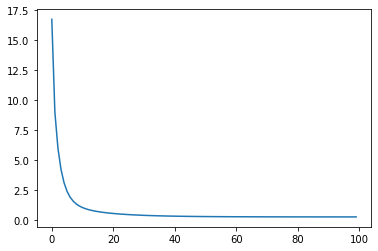

In [69]:
plt.plot(step_list,train_loss_list)
plt.show()

In [70]:
from tensorflow.python.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train/255
x_test=x_test/255

In [71]:
from tensorflow.python.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)